In [2]:
!pip install -U textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import neattext.functions as nfx

warnings.filterwarnings('ignore')
from textblob import TextBlob


In [5]:
data = pd.read_csv('Clean_data.csv')
data.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

                    extracted_hashtags  \
0                                   []   
1                                   []   
2                         ['#COVID19']   
3                         ['#COVID19']   
4  ['#CoronaVirusUpdates', '#COVID19']   

                                         clean_tweet  
0  If I smelled the scent of hand sanitizers toda...  
1  Hey and  wouldnt it have made more sense to ha...  
2   Trump never once claimed was a hoax We all cl...  
3   The one gift has give me is an appreciation f...  
4                 25 July : Media Bulletin on Novel

In [9]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'Polarity': sentiment_polarity, 'Subjectivity':sentiment_subjectivity, 'Sentiment':sentiment_label}
    return result

In [7]:
test1 = data['clean_tweet'].iloc[0]

In [11]:
test1

'If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that… '

In [10]:
get_sentiment(test1)

{'Polarity': -0.25, 'Subjectivity': 0.25, 'Sentiment': 'Negative'}

In [12]:
data['sentiment_result'] = data['clean_tweet'].apply(get_sentiment)

In [13]:
data.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

                    extracted_hashtags  \
0                                   []   
1                                   []   
2                         ['#COVID19']   
3                         ['#COVID19']   
4  ['#CoronaVirusUpdates', '#COVID19']   

                                         clean_tweet  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey and  wouldnt it have made more sense to ha...   
2   Trump never once claimed was a hoax We all cl...   
3   The one gift has give me is an appreciation f...   
4                 25 July : Media Bulletin on Novel    

                                    sentiment_result  
0  {'Polarity': -0.25, 'Subjectivity': 0.25, 'Sen...  
1  {'Polarity': 0.5, 'Subjectivity': 0.5, 'Sentim...  
2  {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...  
3  {'Polarity': 0.0, 'Subjectivity': 0.3571428571...  
4  {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...

In [14]:
data['sentiment_result'].iloc[0]

{'Polarity': -0.25, 'Subjectivity': 0.25, 'Sentiment': 'Negative'}

In [15]:
data = data.join(pd.json_normalize(data['sentiment_result']))

In [16]:
data.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

                    extracted_hashtags  \
0                                   []   
1                                   []   
2                         ['#COVID19']   
3                         ['#COVID19']   
4  ['#CoronaVirusUpdates', '#COVID19']   

                                         clean_tweet  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey and  wouldnt it have made more sense to ha...   
2   Trump never once claimed was a hoax We all cl...   
3   The one gift has give me is an appreciation f...   
4                 25 July : Media Bulletin on Novel    

                                    sentiment_result  Polarity  Subjectivity  \
0  {'Polarity': -0.25, 'Subjectivity': 0.25, 'Sen...     -0.25      0.250000   
1  {'Polarity': 0.5, 'Subjectivity': 0.5, 'Sentim...      0.50      0.500000   
2  {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...      0.00      0.000000   
3  {'Polarity': 0.0, 'Subjectivity': 0.3571428571...      0.00      0.357143   
4  {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...      0.00      0.000000   

  Sentiment  
0  Negative  
1  Positive  
2   Neutral  
3   Neutral  
4   Neutral

In [17]:
data.Sentiment.value_counts()

Neutral     75490
Positive    74154
Negative    29464
Name: Sentiment, dtype: int64

<AxesSubplot:>

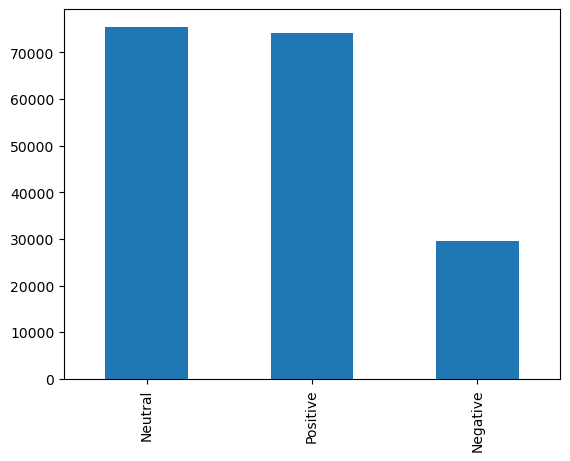

In [18]:
data.Sentiment.value_counts().plot(kind='bar')